<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/Chapter_5_%E1%84%82%E1%85%B2%E1%84%89%E1%85%B3%E1%84%8B%E1%85%A6%E1%84%89%E1%85%A5%E1%84%86%E1%85%A1%E1%86%AB_%E1%84%87%E1%85%A9%E1%84%83%E1%85%A5%E1%86%AB_%E1%84%8F%E1%85%A9%E1%84%85%E1%85%A9%E1%84%82%E1%85%A119_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%2C_%E1%84%8C%E1%85%B5%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%B8_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%A9_%E1%84%8C%E1%85%B5%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%B8_%E1%84%91%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%86%AB%E1%84%92%E1%85%A2%E1%84%87%E1%85%A9%E1%86%B8%E1%84%89%E1%85%B5%E1%84%83%E1%85%A1(%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴스에서만 보던 코로나-19 데이터, 직접 분석하고 직접 판단해봅시다.
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
    RAW_global_confirmed_cases.csv
    RAW_global_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
    
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

## 최종 목표
    - 계속해서 업데이트되는 라이브 데이터 분석하기
    - Pandas를 이용해 원하는 표 형태로 변경
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Plotly를 이용하여 Interactive plot하기
    - FBProphet을 이용해 시계열 데이터를 처리하는 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 시계열 데이터에 관하여

### 코로나19 데이터셋에 관하여

### 시계열 데이터와 일반 테이블 데이터와 다른 점


### FBProphet 라이브러리 설명

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY'] = '50ef5cd85c486772c23beb302ab99e32'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

 76% 5.00M/6.61M [00:00<00:00, 39.1MB/s]
100% 6.61M/6.61M [00:00<00:00, 42.2MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [24]:
df_case = pd.read_csv('/content/RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('/content/RAW_global_deaths.csv')

## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경


In [7]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875


In [25]:
df = df_case.drop(['Lat', 'Long'], axis=1)
df

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487
1,Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013
2,Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764
3,Andorra,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819
4,Angola,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,NaN,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879
276,West Bank and Gaza,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632
277,Yemen,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912
278,Zambia,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209172,209199,209248,209283

In [26]:
df = df.groupby('Country/Region').sum()
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912


In [27]:
df = df.T
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/8/21,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,18153,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46616612,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205
11/9/21,156397,190125,207385,15717,64762,4091,5299418,322364,184071,899777,550446,22592,277113,1571434,20676,617719,1438830,28162,24804,2623,518870,260837,193449,21897025,13864,643003,15103,508591,20170,38264,119227,104348,1745702,11579,5107,1713188,110385,5019158,4332,18153,...,6398,224200,526608,360614,20,22693,2924317,12517,5032056,546653,41019,865,49812,1179192,897078,45468,16451,17486,26196,1982495,19804,26125,1,59963,713352,8290135,46696590,126644,3253327,740572,9412185,395610,188398,6,414220,984805,455949,9891,209918,133242
11/10/21,156414,190815,207509,15744,64815,4102,5300985,324039,185627,911175,552322,22544,277138,1571669,21011,619708,1463548,28568,24833,2623,519669,261799,193449,21909298,13962,646856,15281,509771,20200,38278,119292,105719,1748359,11579,5107,1715352,110454,5021619,4349,18153,...,6398,227681,533663,365095,20,22693,2924622,12546,5038517,547346,41019,865,49902,1180518,901228,45468,16456,17488,26196,1989473,19807,26133,1,60475,715276,8317394,46792903,126714,3277772,740647,9451884,395805,188619,6,416190,992735,456186,9902,209939,133302
11/11/21,156456,191440,207624,15744,64857,4102,5302445,325521,187041,923150,554096,22552,277165,1571906,21311,621689,1463548,28749,24833,2623,521518,262906,193701,21924598,14058,650063,15281,510725,20210,38287,119358,106190,1749800,11579,5107,1718085,110553,5024263,4352,18153,...,6400,230077,540209,368669,20,22837,2924978,12546,5042803,548061,41093,865,49902,1181532,905112,4582

In [28]:
df.index.name = 'Date'
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/8/21,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,18153,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46616612,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205
11/9/21,156397,190125,207385,15717,64762,4091,5299418,322364,184071,899777,550446,22592,277113,1571434,20676,617719,1438830,28162,24804,2623,518870,260837,193449,21897025,13864,643003,15103,508591,20170,38264,119227,104348,1745702,11579,5107,1713188,110385,5019158,4332,18153,...,6398,224200,526608,360614,20,22693,2924317,12517,5032056,546653,41019,865,49812,1179192,897078,45468,16451,17486,26196,1982495,19804,26125,1,59963,713352,8290135,46696590,126644,3253327,740572,9412185,395610,188398,6,414220,984805,455949,9891,209918,133242
11/10/21,156414,190815,207509,15744,64815,4102,5300985,324039,185627,911175,552322,22544,277138,1571669,21011,619708,1463548,28568,24833,2623,519669,261799,193449,21909298,13962,646856,15281,509771,20200,38278,119292,105719,1748359,11579,5107,1715352,110454,5021619,4349,18153,...,6398,227681,533663,365095,20,22693,2924622,12546,5038517,547346,41019,865,49902,1180518,901228,45468,16456,17488,26196,1989473,19807,26133,1,60475,715276,8317394,46792903,126714,3277772,740647,9451884,395805,188619,6,416190,992735,456186,9902,209939,133302


In [30]:
df.reset_index(inplace=True)
df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
df

Country/Region,index,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2,2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
3,3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
4,4,2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,2021-11-08,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46616612,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205
657,657,2021-11-09,156397,190125,207385,15717,64762,4091,5299418,322364,184071,899777,550446,22592,277113,1571434,20676,617719,1438830,28162,24804,2623,518870,260837,193449,21897025,13864,643003,15103,508591,20170,38264,119227,104348,1745702,11579,5107,1713188,110385,5019158,...,6398,224200,526608,360614,20,22693,2924317,12517,5032056,546653,41019,865,49812,1179192,897078,45468,16451,17486,26196,1982495,19804,26125,1,59963,713352,8290135,46696590,126644,3253327,740572,9412185,395610,188398,6,414220,984805,455949,9891,209918,133242
658,658,2021-11-10,156414,190815,207509,15744,64815,4102,5300985,324039,185627,911175,552322,22544,277138,1571669,21011,619708,1463548,28568,24833,2623,519669,261799,193449,21909298,13962,646856,15281,509771,20200,38278,119292,105719,1748359,11579,5107,1715352,110454,5021619,...,6398,227681,533663,365095,20,22693,2924622,12546,5038517,547346,41019,865,49902,1180518,901228,45468,16456,17488,26196,1989473,19807,26133,1,60475,715276,8317394,46792903,126714,3277772,740647,9451884,395805,188619,6,416190,992735,456186,9902,209939,133302
659,659,2021-11-11,156456,191440,207624,15744,64857,4102,5302445,325521,187041,923150,554096,22552,277165,1571906,21311,621689,1463548,28749,24833,2623,521518,262906,193701,21924598,14058,650063,15281,510725,20210,38287,119358,106190,1749800,11579,5107,1718085,110553,5024263,...,6400,230077,540209,368669,20,22837,2924978,12546,5042803,548061,41093,865,49902,1181532,905112,45820,16

In [31]:
df.set_index('Date', inplace=True)
df

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,656,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46616612,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205
2021-11-09,657,156397,190125,207385,15717,64762,4091,5299418,322364,184071,899777,550446,22592,277113,1571434,20676,617719,1438830,28162,24804,2623,518870,260837,193449,21897025,13864,643003,15103,508591,20170,38264,119227,104348,1745702,11579,5107,1713188,110385,5019158,4332,...,6398,224200,526608,360614,20,22693,2924317,12517,5032056,546653,41019,865,49812,1179192,897078,45468,16451,17486,26196,1982495,19804,26125,1,59963,713352,8290135,46696590,126644,3253327,740572,9412185,395610,188398,6,414220,984805,455949,9891,209918,133242
2021-11-10,658,156414,190815,207509,15744,64815,4102,5300985,324039,185627,911175,552322,22544,277138,1571669,21011,619708,1463548,28568,24833,2623,519669,261799,193449,21909298,13962,646856,15281,509771,20200,38278,119292,105719,1748359,11579,5107,1715352,110454,5021619,4349,...,6398,227681,533663,365095,20,22693,2924622,12546,5038517,547346,41019,865,49902,1180518,901228,45468,16456,17488,26196,1989473,19807,26133,1,60475,715276,8317394,46792903,126714,3277772,740647,9451884,395805,188619,6,416190,992735,456186,9902,209939,133302


In [36]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name = 'Date'
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  return df

In [37]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [40]:
df_case.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-08,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,18153,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46616612,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205
2021-11-09,156397,190125,207385,15717,64762,4091,5299418,322364,184071,899777,550446,22592,277113,1571434,20676,617719,1438830,28162,24804,2623,518870,260837,193449,21897025,13864,643003,15103,508591,20170,38264,119227,104348,1745702,11579,5107,1713188,110385,5019158,4332,18153,...,6398,224200,526608,360614,20,22693,2924317,12517,5032056,546653,41019,865,49812,1179192,897078,45468,16451,17486,26196,1982495,19804,26125,1,59963,713352,8290135,46696590,126644,3253327,740572,9412185,395610,188398,6,414220,984805,455949,9891,209918,133242
2021-11-10,156414,190815,207509,15744,64815,4102,5300985,324039,185627,911175,552322,22544,277138,1571669,21011,619708,1463548,28568,24833,2623,519669,261799,193449,21909298,13962,646856,15281,509771,20200,38278,119292,105719,1748359,11579,5107,1715352,110454,5021619,4349,18153,...,6398,227681,533663,365095,20,22693,2924622,12546,5038517,547346,41019,865,49902,1180518,901228,45468,16456,17488,26196,1989473,19807,26133,1,60475,715276,8317394,46792903,126714,3277772,740647,9451884,395805,188619,6,416190,992735,456186,9902,209939,133302
2021-11-11,156456,191440,207624,15744,64857,4102,5302445,325521,187041,923150,554096,22552,277165,1571906,21311,621689,1463548,28749,24833,2623,521518,262906,193701,21924598,14058,650063,15281,510725,20210,38287,119358,106190,1749800,11579,5107,1718085,110553,5024263,4352,18153,...,6400,230077,540209,368669,20,22837,2924978,12546,5042803,548061,41093,865,49902,1181532,905112,45820,16465,17488,26196,1996969,19809,26133,1,60984,715489,8342292,46851529,126763,3303694,740729,9495395,395964,188892,6,416190,1000897,456407,9907,209953,133329
2021-11-12,156487,192013,207764,15819,64875,4106,5304059,326830,188493,934948,556430,22572,277184,1572127,21595,623628,1484712,28899,24833,2623,522530,263587,193701,21939196,14121,653209,15281,511717,20221,38293,119421,106190,1753722,11666,5107,1721025,110629,5026822,4363,18153,...,6400,233176,547052,372109,20,22837,2925371,12558,5047156,548784,41093,865,49950,1182471,909038,45820,16475,17488,26196,2004274,19809,26133,1,61519,715571,8365929,46991304,126833,3328934,740801,9534544,396175,189186,6,417998,1009879,456632,9912,209963,133329


### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


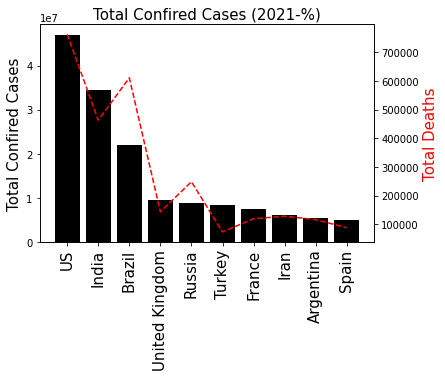

In [46]:
# 아래와 같이 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confired Cases', size=15)
plt.xlabel('')
plt.title('Total Confired Cases (%s)' % top_ten_cases.name.strftime('%Y-%'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
plt.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

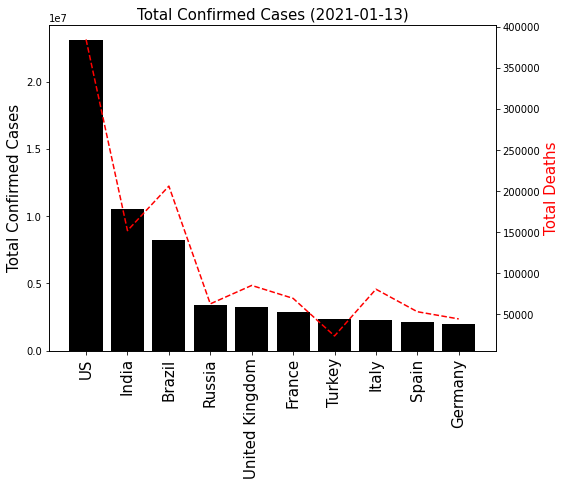

In [ ]:
# 이 셀의 결과가 지워지지 않도록 주의하세요.

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

In [ ]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  # TODO: 입력받은 국가의 누적 확진자/사망자 수 시각화

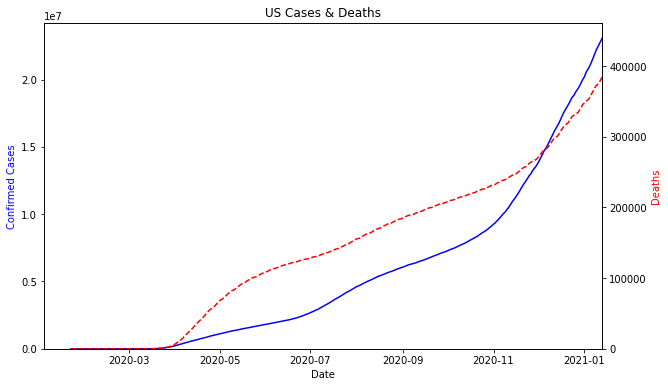

In [ ]:
# 아래와 같은 결과가 나오도록 하시오. 결과가 지워지지 않도록 주의하세요.
plot_case_with_death('US')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

In [ ]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.






In [ ]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.





## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [ ]:
import plotly.graph_objects as go

In [ ]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [ ]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(...)
  return data

### 문제 9. Choropleth map 시각화하기

In [ ]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
data = get_choropleth_data(...)
fig = go.Figure(data=data)
fig.update_layout(...)

fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [ ]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.
df = 




### 문제 11. 학습데이터와 테스트데이터 분리하기


In [ ]:
from math import floor

In [ ]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환

In [ ]:
train_df, test_df = train_test_split_df(df, 0.1)

## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [ ]:
from fbprophet import Prophet

In [ ]:
model =




### 문제 13. Prophet 모델 학습 결과 시각화하기

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용





### 문제 14. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# test_df와 pred를 비교하여 r2_score 평가





### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

In [ ]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용






## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [ ]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기






### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


In [ ]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기




